In [58]:
import numpy as np
import pandas as pd
import os
import specutils
import matplotlib.pyplot as plt
import astropy
import astropy.units as units
import astropy.utils as utils
import astropy.io as io

import FunctionLib as F

In [59]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, append=True)

In [60]:
DJA_Catalog_DataFrame=pd.read_csv('./DJACatalog.csv')

DJA_File_Path=os.path.expanduser('~/DJAData/')
if os.path.exists(DJA_File_Path):
    DJA_File_List=np.array(os.listdir(DJA_File_Path))
print('Number of files in DJA directory:', len(DJA_File_List))


Number of files in DJA directory: 18506


In [61]:
DJA_File_List=[f for f in os.listdir('./') if f.startswith('goodsn')]
print('Number of files in current directory:', len(DJA_File_List))

Number of files in current directory: 3


In [62]:
redshift=F.Load_Redshift(DJA_Catalog_DataFrame, DJA_File_List[1])
print('Redshift:', redshift)

Redshift: 4.7275


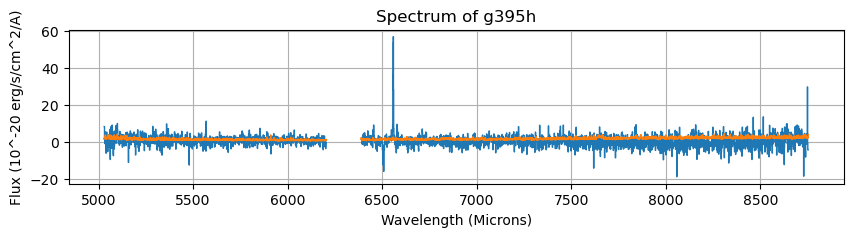

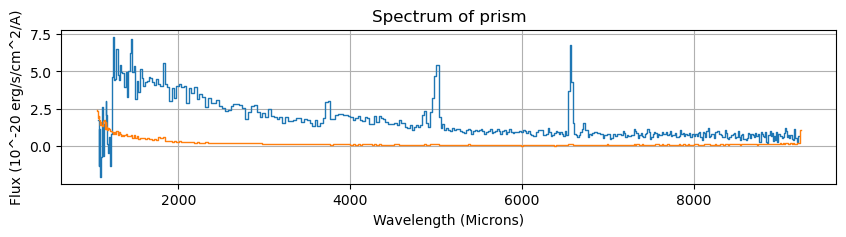

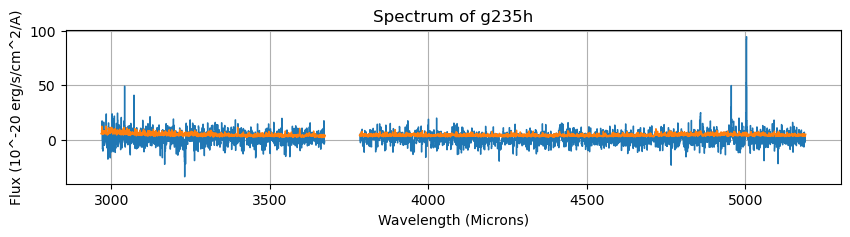

In [63]:
for File_Name in DJA_File_List:
    if File_Name.endswith('.fits'):
        grating=File_Name.split('_')[1].split('-')[0]
        spectrum=F.Load_N_Rescale_Spectra(File_Name)
        spectrum=F.Calibrate_Spectra_To_RestFrame(spectrum, redshift)
        plt.figure(figsize=(10, 2))
        plt.plot(spectrum.wavelength.value, spectrum.flux.value*1e20,drawstyle='steps-mid',linewidth=1)
        plt.plot(spectrum.wavelength.value, spectrum.uncertainty.array*1e20,drawstyle='steps-mid',linewidth=1)
        plt.xlabel('Wavelength (Microns)')
        plt.ylabel('Flux (10^-20 erg/s/cm^2/A)')
        plt.grid()

        plt.title('Spectrum of ' + grating)

In [64]:
g235h_spectra=F.Load_N_Rescale_Spectra('/home/xingyaocai/DustCurve/goodsn-wide2-v2_g235h-f170lp_1211_2081.spec.fits')
g235h_spectra=F.Calibrate_Spectra_To_RestFrame(g235h_spectra, redshift)

g395h_spectra=F.Load_N_Rescale_Spectra('/home/xingyaocai/DustCurve/goodsn-wide2-v2_g395h-f290lp_1211_2081.spec.fits')
g395h_spectra=F.Calibrate_Spectra_To_RestFrame(g395h_spectra, redshift)

prism_spectra=F.Load_N_Rescale_Spectra('/home/xingyaocai/DustCurve/goodsn-wide2-v2_prism-clear_1211_2081.spec.fits')
prism_spectra=F.Calibrate_Spectra_To_RestFrame(prism_spectra, redshift)

In [69]:
g235h_spectra.wavelength

<SpectralAxis [2898.2977059 , 2898.95618318, 2899.61466045, ..., 5532.86528596,
   5533.52376324, 5534.18224051] Angstrom>

In [65]:
import specutils.fitting as specfit

In [66]:
lines=specfit.find_lines_threshold(g235h_spectra, noise_factor=10)

In [67]:
lines

line_center,line_type,line_center_index
micron,,
float64,str8,int64
0.4956039192452565,emission,3125
0.5004108033578356,emission,3198


In [ ]:
g235h_spectra.flux[lines['line_center_index'][0]]

In [68]:
lines=specfit.find_lines_threshold(prism_spectra, noise_factor=20)
lines

line_center,line_type,line_center_index
micron,,
float64,str8,int64
0.49225768646856244,emission,166
0.5016905779746706,emission,170
0.6563022818855139,emission,246


In [70]:
prism_spectra.wavelength

<SpectralAxis [1012.65823459, 1019.09229588, 1025.64448903, 1032.31814842,
   1039.11700604, 1046.04441554, 1053.10388948, 1060.29968927,
   1067.63567506, 1075.11582595, 1082.74429797, 1090.52579019,
   1098.46489853, 1106.56629357, 1114.83484058, 1123.27560331,
   1131.89384625, 1140.69512235, 1149.68521167, 1158.86996632,
   1168.25545804, 1177.84798126, 1187.6540534 , 1197.68042018,
   1207.93405948, 1218.42217891, 1229.1522209 , 1240.13201801,
   1251.36956332, 1262.87304054, 1274.65086863, 1286.71169804,
   1299.0645216 , 1311.7186973 , 1324.68356908, 1337.96874334,
   1351.58432927, 1365.54029845, 1379.84704058, 1394.51500731,
   1409.55485778, 1424.97731828, 1440.79328812, 1457.0136195 ,
   1473.64924629, 1490.7110207 , 1508.20970192, 1526.15590722,
   1544.56002049, 1563.43208029, 1582.78175464, 1602.61825621,
   1622.95023328, 1643.78556831, 1665.13140596, 1686.99405494,
   1709.37889351, 1732.29013064, 1755.73052955, 1779.70204425,
   1804.2045734 , 1829.23723817, 1854.79671

In [71]:
specfit.find_lines_threshold(g395h_spectra, noise_factor=10)

line_center,line_type,line_center_index
micron,,
float64,str8,int64
0.6559042258563645,emission,1461
0.8749556708521709,emission,3439


In [ ]:
np.array(DJA_Catalog_DataFrame['nGr']).sum()+np.array(DJA_Catalog_DataFrame['nGr']).shape[0]

In [ ]:
DJA_Catalog_DataFrame

In [75]:
number=0
for Index_In_DJA_Catalog in range(len(DJA_Catalog_DataFrame)):

    z=DJA_Catalog_DataFrame['z'][Index_In_DJA_Catalog]
    if (z<4)or (z>6.5):
        continue

    Spectra_NGrating=DJA_Catalog_DataFrame.nGr[Index_In_DJA_Catalog]
    if Spectra_NGrating<2:
        continue

    FITS_File_Root_Name=DJA_Catalog_DataFrame.root[Index_In_DJA_Catalog]
    Prism_FITS_File_Name=DJA_Catalog_DataFrame.file[Index_In_DJA_Catalog]

    Grating_List=DJA_Catalog_DataFrame.Grating[Index_In_DJA_Catalog].split('   ')
    number+=1
    for Grating in Grating_List:
        Grating=Grating.strip().lower()



In [76]:
number

620

In [ ]:

check the wavelength

use gaussian fit to find the line center